# Mine into subgroup 1. Extract minigroups with high concentration of PHAs

In [1]:
%matplotlib inline
import string

import math
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle, sys, os, time
import numpy as np
import pydotplus
import pandas as pd
import scipy.stats as ss
from sklearn import neighbors, svm
from sklearn.neighbors.kde import KernelDensity
from sklearn import preprocessing as pp
from sklearn import tree

import read_database as rdb
import generate_orbits as go
import learn_data as ld
import visualize_data as vd
import asterion_learn as al
from  copy import deepcopy

font = {'size': 14}
mpl.rc('font', **font)

** Load generated and real NEAs from subgroup #1 **

In [2]:
dumps_gen_sg1 = ['./asteroid_data/haz_gen_sg1.p', 
                 './asteroid_data/nohaz_gen_sg1.p',
                 './asteroid_data/haz_gen_sg1_rest.p', 
                 './asteroid_data/nohaz_gen_sg1_rest.p']
            
dumps_genu = ['./asteroid_data/haz_genu_sg1.p', 
              './asteroid_data/nohaz_genu_sg1.p',
              './asteroid_data/haz_genu_sg1_rest.p', 
              './asteroid_data/nohaz_genu_sg1_rest.p']
         
dumps_real = ['./asteroid_data/haz_test.p', 
              './asteroid_data/nohaz_test.p']

haz_gen, nohaz_gen, haz_gen_rest, nohaz_gen_rest = map(rdb.loadObject, dumps_gen_sg1)
haz_genu, nohaz_genu, haz_genu_rest, nohaz_genu_rest = map(rdb.loadObject, dumps_genu)

haz_real, nohaz_real = map(rdb.loadObject, dumps_real)
# haz_gen_full = rdb.loadObject('./asteroid_data/haz_rand_2e5.p')
# nohaz_gen_full = rdb.loadObject('./asteroid_data/nohaz_rand_2e5.p')

** Investigate distributions of orbital parameters for the subgroup #1 **

In [3]:
# datasets_gen = [haz_gen, nohaz_gen]
# datasets_genu = [haz_genu, nohaz_genu]
# datasets_real = [haz_real, nohaz_real]

In [4]:
# vd.display_allparams([haz_gen, nohaz_gen], vd.combs, vd.colnames)

In [5]:
# reload(vd)
# vd.display_allparams(datasets_genu, vd.combs, vd.colnames)

A body of black

that carried no reflection

defying its own room

un-earthly eggs of decreation

## Cut off non-hazardous asteroids with high values of q

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


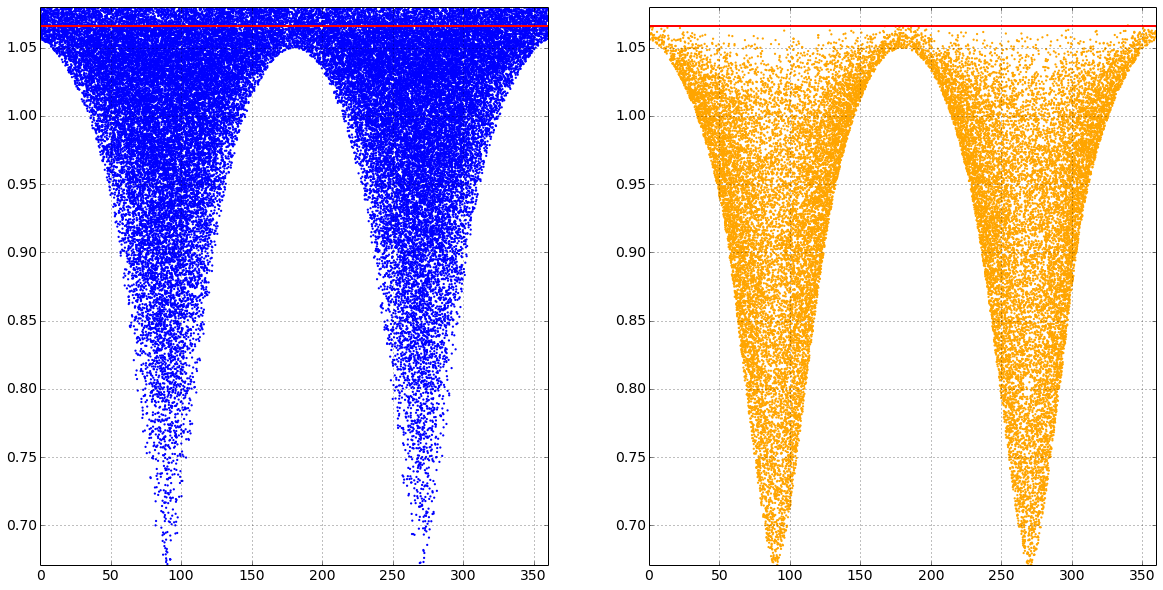

In [6]:
q_split = 1.066
cutcol = ['w', 'q']
haz_gen_cut, nohaz_gen_cut = ld.cut_params(haz_gen, nohaz_gen, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_params(haz_gen, nohaz_gen, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_2params(cutcol, [haz_gen_sg1b, nohaz_gen_sg1b])
p1, p2 = [[0.0, q_split], [360.0, q_split]]
vd.linearcut_plot(p1, p2, haz_gen_cut, nohaz_gen_cut)

In [7]:
haz_gen_sg1, haz_gen_sg1__ = ld.split_by_colval(haz_gen, 'q', q_split)
nohaz_gen_sg1, nohaz_gen_sg1__ = ld.split_by_colval(nohaz_gen, 'q', q_split)

# haz_genu_sg1b, haz_genu_sg1z = ld.split_by_colval(haz_genu, 'q', q_split)
# nohaz_genu_sg1b, nohaz_genu_sg1z = ld.split_by_colval(nohaz_genu, 'q', q_split)

## Extract Atiras and Atens

In [84]:
# reload(rdb)

In [8]:
atiras_haz, atiras_haz_num = rdb.get_atiras(haz_gen_sg1)
atiras_nohaz, atiras_nohaz_num = rdb.get_atiras(nohaz_gen_sg1)

In [9]:
atens_haz, atens_haz_num = rdb.get_atens(haz_gen_sg1)
atens_nohaz, atens_nohaz_num = rdb.get_atens(nohaz_gen_sg1)

In [10]:
atiras_atens_haz = pd.concat((atens_haz, atiras_haz))
atiras_atens_nohaz = pd.concat((atens_nohaz, atiras_nohaz))
atiras_atens_haz_num, atiras_atens_nohaz_num = map(len, [atiras_atens_haz, atiras_atens_nohaz])

In [11]:
print atiras_atens_haz_num, atiras_atens_nohaz_num

1053 554


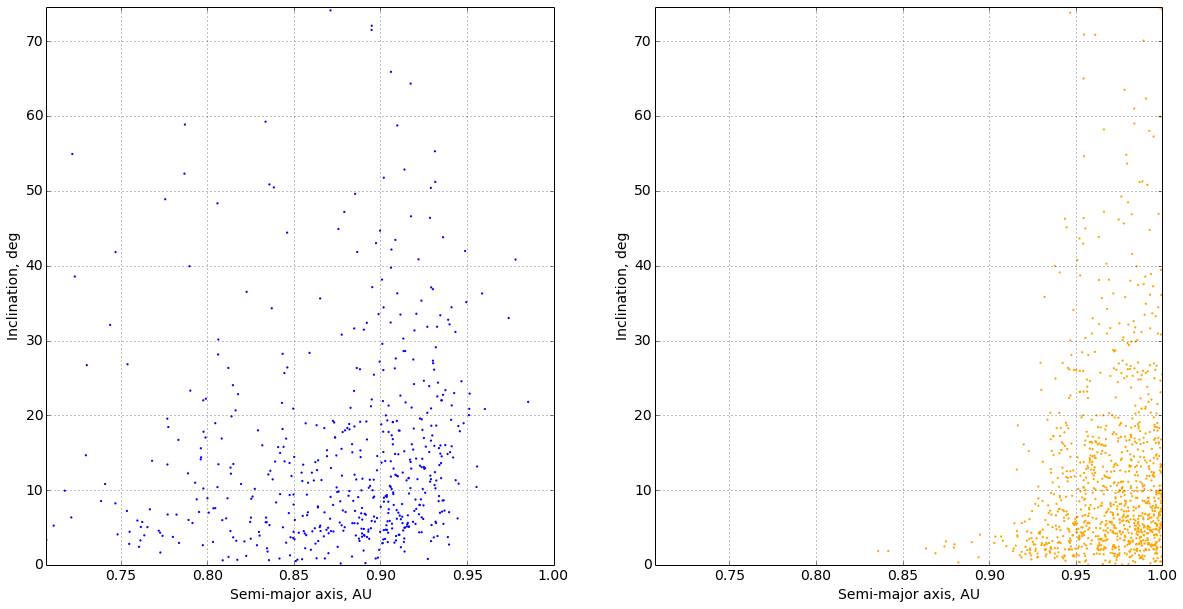

In [12]:
cutcol = ['a', 'i']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [atiras_atens_haz, atiras_atens_nohaz])

In [13]:
# cutcol = ['a', 'q']
# labels = [vd.colnames[nm] for nm in cutcol]
# vd.display_param2d(cutcol, labels, [atiras_haz, atiras_nohaz])

In [14]:
# cutcol = ['a', 'q']
# labels = [vd.colnames[nm] for nm in cutcol]
# vd.display_param2d(cutcol, labels, [atens_haz, atens_nohaz])

In [15]:
# vd.display_allparams([atens_haz, atens_nohaz], vd.combs, vd.colnames)

In [16]:
# vd.display_allparams([atiras_atens_haz, atiras_atens_nohaz], vd.combs, vd.colnames)

In [20]:
reload(al)
clf = svm.LinearSVC()
sg1aa, sg1aa__, scales = al.split_by_clf(clf, cutcol, atiras_atens_haz, atiras_atens_nohaz)
haz_sg1aa, nohaz_sg1aa = sg1aa

purity of PHA region: 0.923357664234
purity of non-PHA region: 0.919765166341


In [108]:
# vd.display_param2d(cutcol, labels, [haz_sg1aa, nohaz_sg1aa])

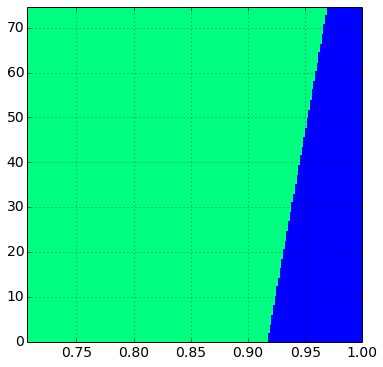

In [21]:
plotgrid = np.array([[0.0, 0.0], [1.0, 1.0]])
vd.plot_classifier(plotgrid, clf, num=200, figsize=(6,6), scales=scales)

## Extract Apollos

In [36]:
haz_gen_apollo, haz_ap_num = rdb.get_apollos(haz_gen_sg1)
nohaz_gen_apollo, nohaz_ap_num = rdb.get_apollos(nohaz_gen_sg1)

In [ ]:
# vd.display_allparams([apollos_haz, apollos_nohaz], vd.combs, vd.colnames)

### Split apollos by q-i plane

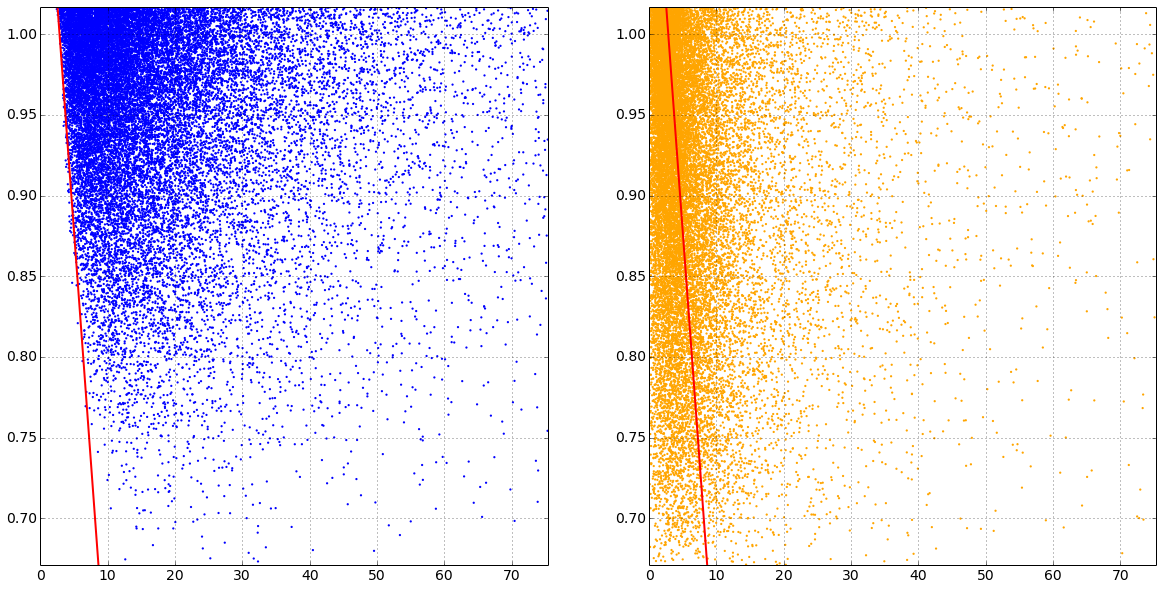

In [42]:
cutcol = ['i', 'q']
haz_cut, nohaz_cut = ld.cut_params(haz_gen_apollo, nohaz_gen_apollo, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_params(haz_gen, nohaz_gen, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_2params(cutcol, [haz_gen_sg1b, nohaz_gen_sg1b])
p1, p2 = [[2.5, 1.02], [9.0, 0.65]]
vd.linearcut_plot(p1, p2, haz_cut, nohaz_cut)

In [43]:
reload(ld)
apollo_qi, apollo_qi__ = ld.split_by_line(haz_gen_apollo, nohaz_gen_apollo, [p1, p2], cutcol)
haz_gen_apollo_qi, nohaz_gen_apollo_qi = apollo_qi
haz_gen_apollo_qi__, nohaz_gen_apollo_qi__ = apollo_qi__

PHA purity of the left subset: 0.994832797114
PHA purity of the right subset: 0.339817032697


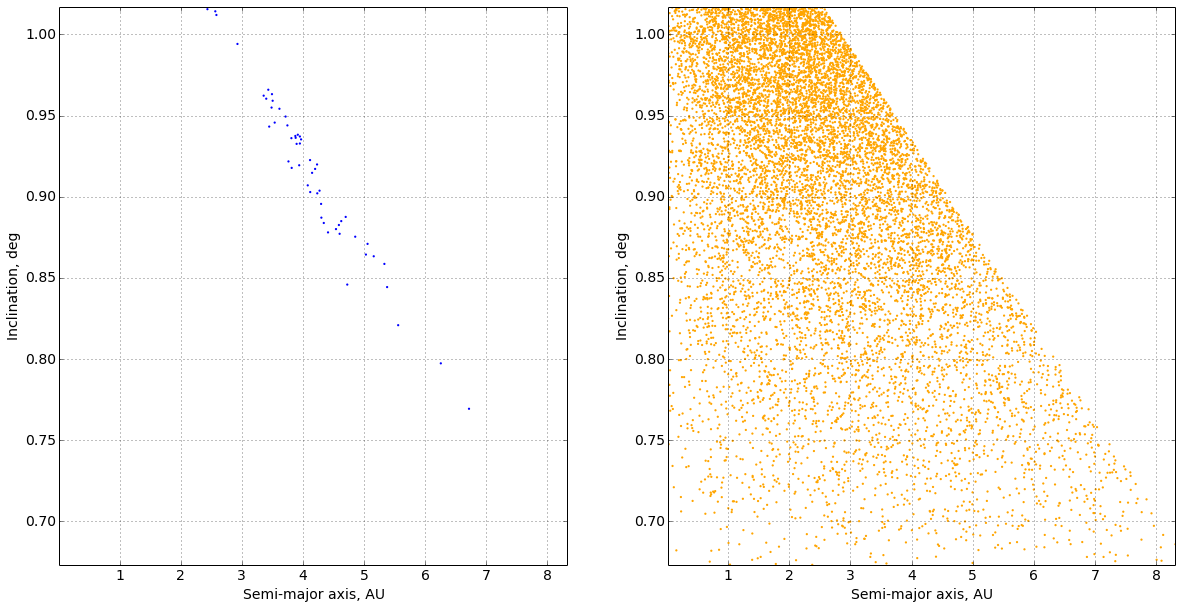

In [40]:
vd.display_param2d(cutcol, labels, [haz_gen_apollo_qi, nohaz_gen_apollo_qi])

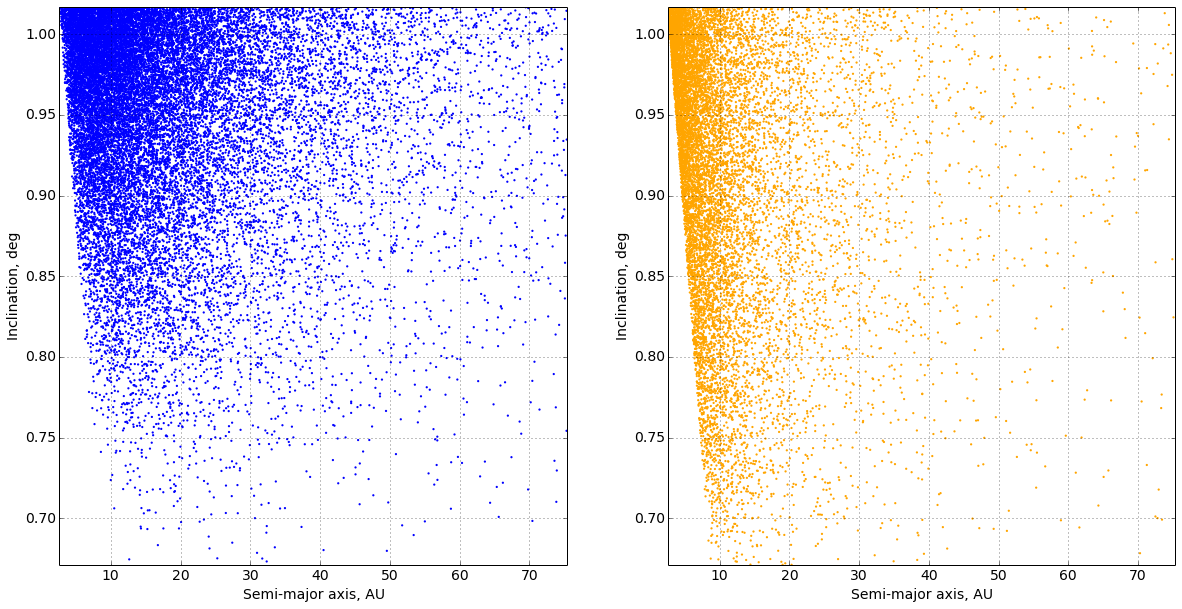

In [33]:
vd.display_param2d(cutcol, labels, [haz_gen_apollo_qi__, nohaz_gen_apollo_qi__])

### Split right subset of apollos by q-a plane

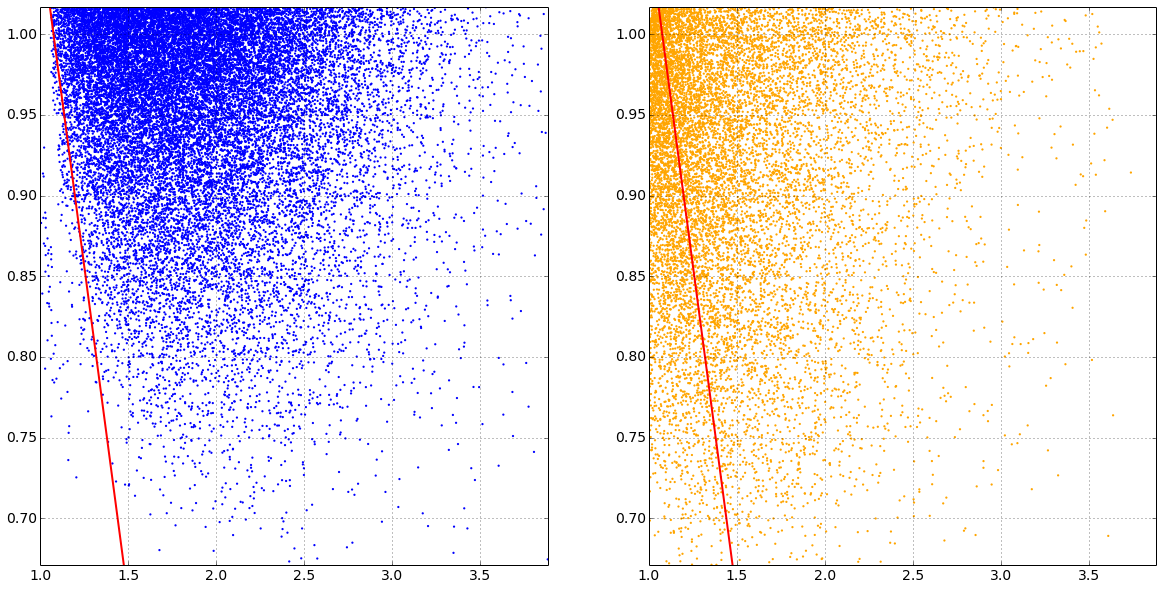

In [44]:
cutcol = ['a', 'q']
haz_cut, nohaz_cut = ld.cut_params(haz_gen_apollo_qi__, nohaz_gen_apollo_qi__, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_params(haz_gen, nohaz_gen, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_2params(cutcol, [haz_gen_sg1b, nohaz_gen_sg1b])
p1, p2 = [[1.05, 1.02], [1.5, 0.65]]
vd.linearcut_plot(p1, p2, haz_cut, nohaz_cut)

In [45]:
reload(ld)
apollo_qa, apollo_qa__ = ld.split_by_line(haz_gen_apollo_qi__, nohaz_gen_apollo_qi__, [p1, p2], cutcol)
haz_gen_apollo_qa, nohaz_gen_apollo_qa = apollo_qa
haz_gen_apollo_qa__, nohaz_gen_apollo_qa__ = apollo_qa__

PHA purity of the left subset: 0.929450615431
PHA purity of the right subset: 0.277107279693


### Extract boundary layers from the right subset of apollos

In [26]:
# vd.display_allparams([haz_gen_apollo_qa__, nohaz_gen_apollo_qa__], vd.combs, vd.colnames)

** Amplify distribution by the symmetric copies of the dataset **

In [46]:
haz_gen_apollo_qa__se = ld.add_doublemirror_column(haz_gen_apollo_qa__, 'w', 180.0)
nohaz_gen_apollo_qa__se = ld.add_doublemirror_column(nohaz_gen_apollo_qa__, 'w', 180.0)

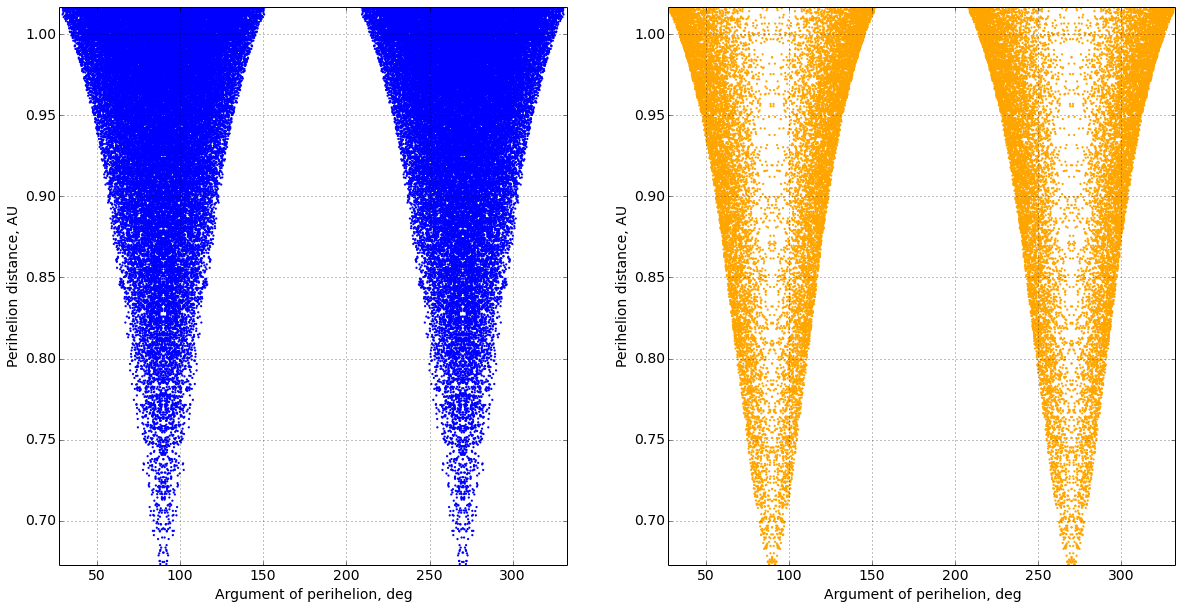

In [47]:
cutcol = ['w', 'q']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_apollo_qa__se, nohaz_gen_apollo_qa__se])

In [48]:
reload(al)
clf = svm.SVC(gamma=20., C=10.0, class_weight={1: 2.8})
apollo_wq, apollo_wq__, scales = al.split_by_clf(clf, cutcol, haz_gen_apollo_qa__, nohaz_gen_apollo_qa__,
                                                 haz_gen_apollo_qa__, nohaz_gen_apollo_qa__)
haz_gen_apollo_wq, nohaz_gen_apollo_wq = apollo_wq
haz_gen_apollo_wq__, nohaz_gen_apollo_wq__ = apollo_wq__

purity of PHA region: 0.538738306548
purity of non-PHA region: 0.896826662414


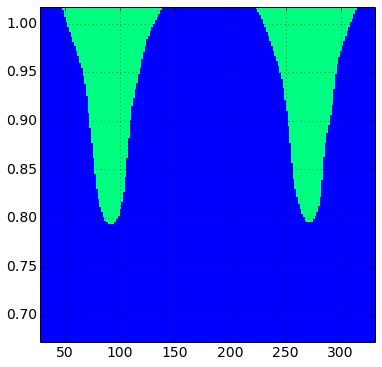

In [50]:
plotgrid = np.array([[0.0, 0.0], [1.0, 1.0]])
vd.plot_classifier(plotgrid, clf, num=200, figsize=(6,6), scales=scales)

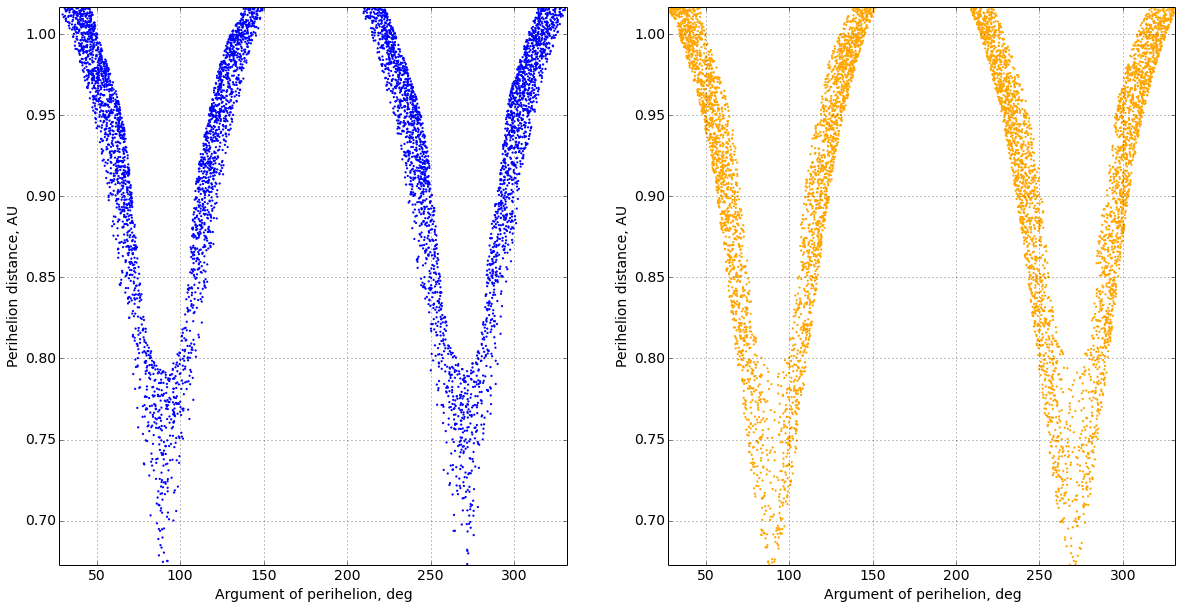

In [52]:
cutcol = ['w', 'q']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_apollo_wq, nohaz_gen_apollo_wq]) #invertaxes=[0,1]

### Split boundary layer of the apollo subset by a-i

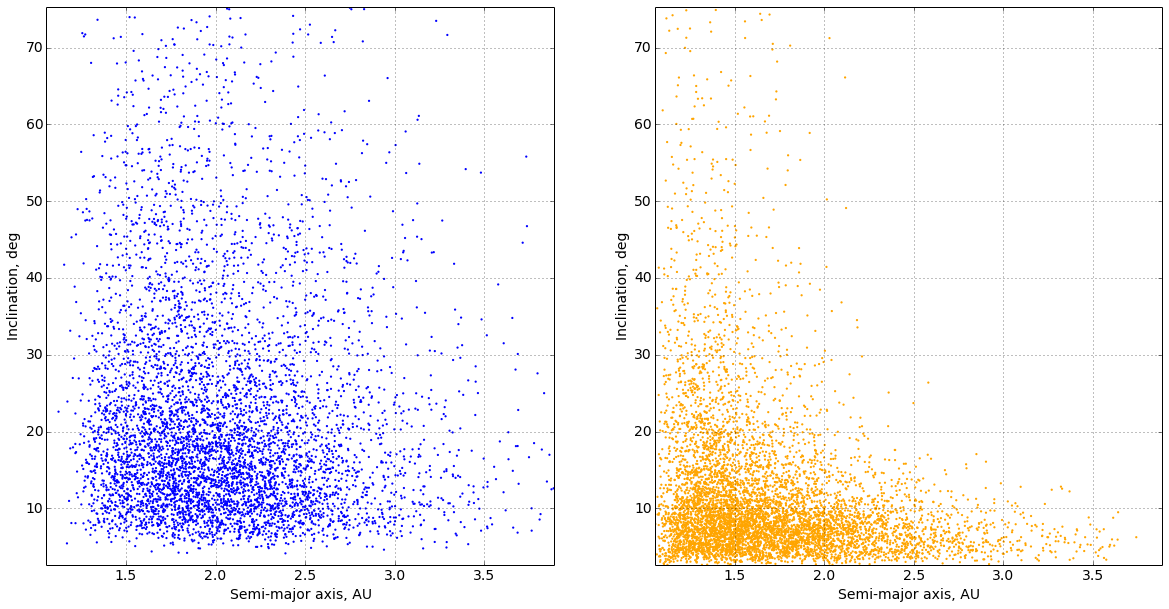

In [185]:
cutcol = ['a', 'i']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_apollo_wq, nohaz_gen_apollo_wq]) #invertaxes=[0,1]

In [200]:
reload(al)
clf = svm.SVC(gamma=0.67, C=10000.0, class_weight={0: 2.5})
# clf = svm.SVC(gamma=67.0, C=100.0, class_weight={0: 2.5})
apollo_ai, apollo_ai__, scales = al.split_by_clf(clf, cutcol, haz_gen_apollo_wq, nohaz_gen_apollo_wq)
haz_gen_apollo_ai, nohaz_gen_apollo_ai = apollo_ai
haz_gen_apollo_ai__, nohaz_gen_apollo_ai__ = apollo_ai__

purity of PHA region: 0.901544401544
purity of non-PHA region: 0.676864244742


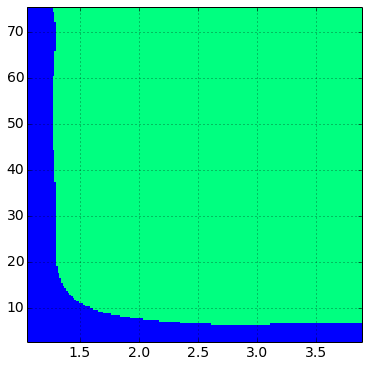

In [201]:
vd.plot_classifier(plotgrid, clf, num=200, figsize=(6,6), scales=scales)

In [68]:
# vd.display_allparams([haz_gen_sg1b_ee, nohaz_gen_sg1b_ee], vd.combs, vd.colnames)

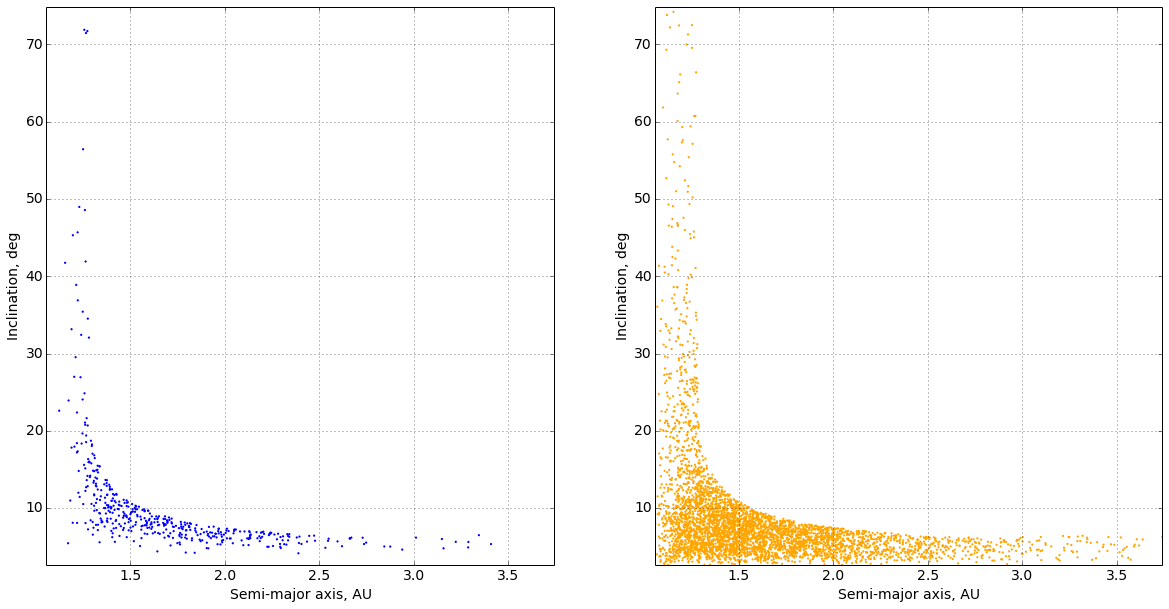

In [203]:
cutcol = ['a', 'i']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_apollo_ai, nohaz_gen_apollo_ai]) #invertaxes=[0,1]

In [204]:
# print float(len(haz_gen_sg1bin) + len(haz_gen_sg1bup) + len(haz_gen_sg1c)*0.5)/len(haz_gen) # len(haz_gen_sg1yy)

## Extract Amors

In [165]:
haz_gen_amor, haz_am_num = rdb.get_amors(haz_gen_sg1)
nohaz_gen_amor, nohaz_am_num = rdb.get_amors(nohaz_gen_sg1)

In [179]:
# vd.display_allparams([haz_gen_amor, nohaz_gen_amor], vd.combs, vd.colnames)

### Cut off nonhazardous 'clouds' by w-i**

In [180]:
haz_gen_amor_se = ld.add_doublemirror_column(haz_gen_amor, 'w', 180.0)
nohaz_gen_amor_se = ld.add_doublemirror_column(nohaz_gen_amor, 'w', 180.0)

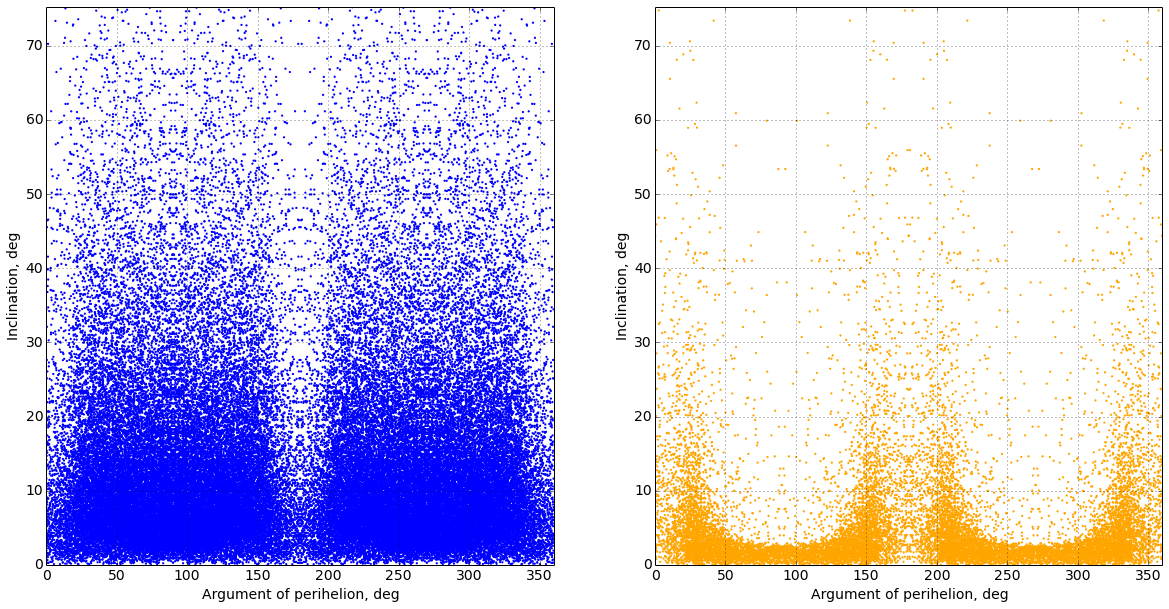

In [205]:
cutcol = ['w', 'i']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_amor_se, nohaz_gen_amor_se])

In [246]:
reload(al)
clf = svm.SVC(gamma=10., C=0.08, class_weight={1: 5.5})
amor_wi, amor_wi__, scales = al.split_by_clf(clf, cutcol, haz_gen_amor, nohaz_gen_amor)
haz_gen_amor_wi, nohaz_gen_amor_wi = amor_wi
haz_gen_amor_wi__, nohaz_gen_amor_wi__ = amor_wi__

purity of PHA region: 0.349855390446
purity of non-PHA region: 0.96020985215


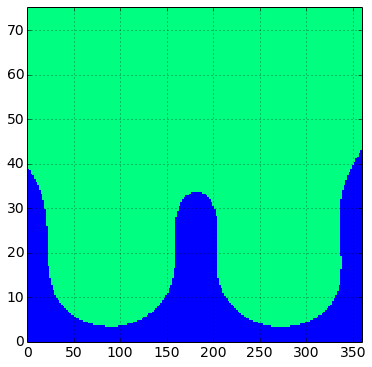

In [247]:
vd.plot_classifier(plotgrid, clf, num=200, figsize=(6,6), scales=scales)

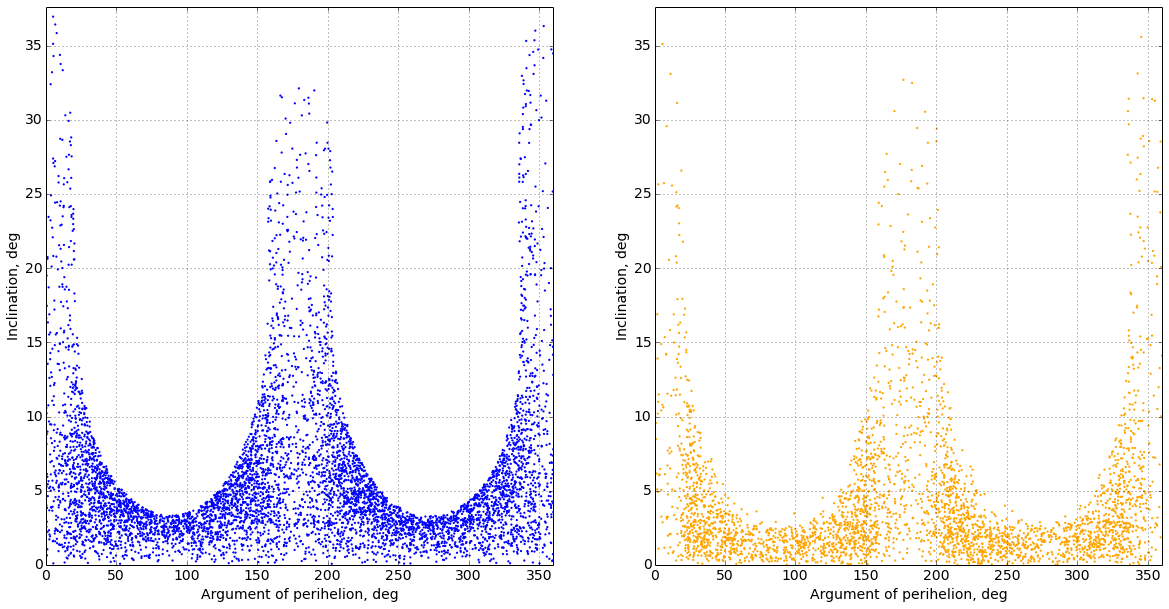

In [248]:
vd.display_param2d(cutcol, labels, [haz_gen_amor_wi, nohaz_gen_amor_wi])

In [95]:
# vd.display_allparams([haz_gen_sg1g, nohaz_gen_sg1g], vd.combs, vd.colnames)

## Extract PHA belt by 3 parameters

In [252]:
haz_gen_amor_wi_se = ld.add_mirror_column(haz_gen_amor_wi, 'w', 180.0)
nohaz_gen_amor_wi_se = ld.add_mirror_column(nohaz_gen_amor_wi, 'w', 180.0)

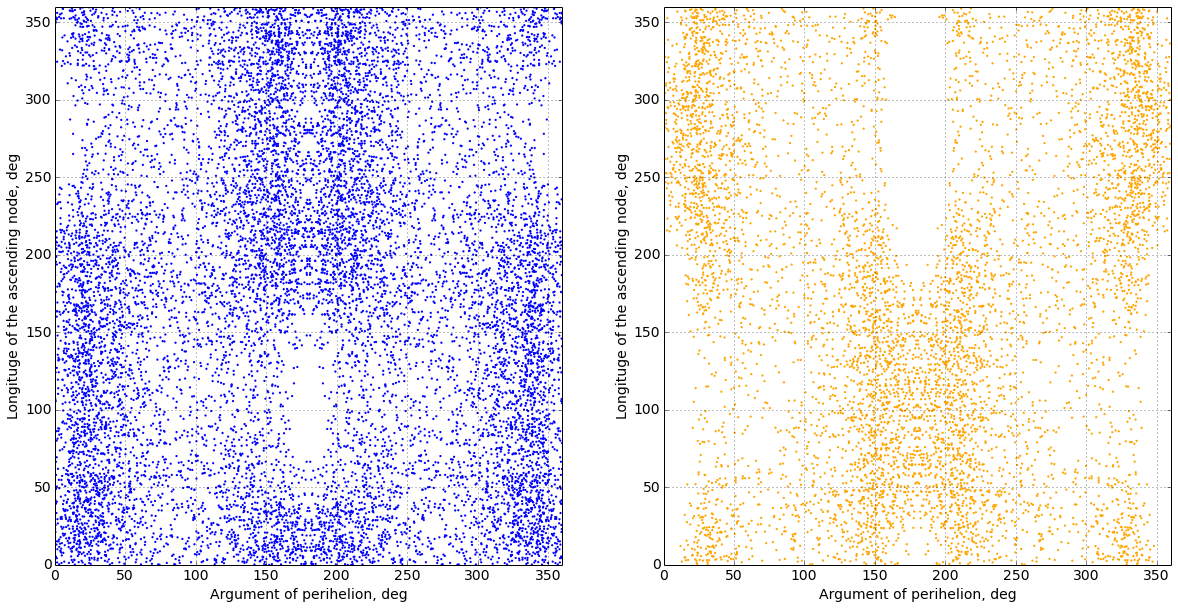

In [253]:
cutcol = ['w', 'om']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_amor_wi_se, nohaz_gen_amor_wi_se])

In [254]:
cutcol = ['w', 'q', 'om']
clf = svm.SVC(gamma=20., C=1, class_weight={0: 2.0})
amor_wqom, amor_wqom__, scales = al.split_by_clf(clf, cutcol, haz_gen_amor_wi_se, nohaz_gen_amor_wi_se,
                                                 haz_gen_amor_wi, nohaz_gen_amor_wi)
haz_gen_amor_wqom, nohaz_gen_amor_wqom = amor_wqom
haz_gen_amor_wqom__, nohaz_gen_amor_wqom__ = amor_wqom__

purity of PHA region: 0.8573551263
purity of non-PHA region: 0.778096903097


** Leftovers **

In [84]:
# cutcol = ['w', 'q', 'i']
# haz_gen_sg1c_left_cut, nohaz_gen_sg1c_left_cut = ld.cut_params(haz_gen_sg1c_left, nohaz_gen_sg1c_left, cutcol)
# bounds = al.common_bounds([haz_gen_sg1c_left_cut, nohaz_gen_sg1c_left_cut])
# haz_gen_sg1c_left_cut, haz_gen_sg1c_left_sc = al.normalize_dataset(haz_gen_sg1c_left_cut, bounds=bounds)
# nohaz_gen_sg1c_left_cut, nohaz_gen_sg1c_left_sc = al.normalize_dataset(nohaz_gen_sg1c_left_cut, bounds=bounds)

In [85]:
# xtrain, ytrain = ld.mix_up(haz_gen_sg1c_left_cut, nohaz_gen_sg1c_left_cut)
# clf = neighbors.KNeighborsClassifier(n_neighbors=100)
# clf = svm.SVC(gamma=80., C=1.0)
# clf = clf.fit(xtrain, ytrain)

In [86]:
# haz_cls = clf.predict(haz_gen_sg1c_left_cut)
# nohaz_cls = clf.predict(nohaz_gen_sg1c_left_cut)

In [87]:
# haz_extr_inds = np.where(haz_cls == 1)[0]
# nohaz_extr_inds = np.where(nohaz_cls == 1)[0]

In [88]:
# haz_left_inds = np.where(haz_cls == 0)[0]
# nohaz_left_inds = np.where(nohaz_cls == 0)[0]

In [89]:
# haz_gen_sg1c_leftE = haz_gen_sg1c_left.iloc[haz_extr_inds]
# nohaz_gen_sg1c_leftE = nohaz_gen_sg1c_left.iloc[nohaz_extr_inds]

In [90]:
# haz_gen_sg1c_leftL = haz_gen_sg1c_left.iloc[haz_left_inds]
# nohaz_gen_sg1c_leftL = nohaz_gen_sg1c_left.iloc[nohaz_left_inds]

In [91]:
# print 1.0 - float(len(nohaz_gen_sg1c_leftE))/(len(haz_gen_sg1c_leftE) + len(nohaz_gen_sg1c_leftE))

In [92]:
# print len(haz_gen_sg1c_leftE)
# print len(nohaz_gen_sg1c_leftE)

In [93]:
# print len(haz_gen_sg1c_leftL)
# print len(nohaz_gen_sg1c_leftL)

In [94]:
# print 1.0 - float(len(nohaz_gen_sg1c_leftL))/(len(haz_gen_sg1c_leftL) + len(nohaz_gen_sg1c_leftL))

## Split subgroup into 2 minigroups by the density of nonhazardous asteroids

In [9]:
# cutcol = ['a', 'i']
# labels = [vd.colnames['a'], vd.colnames['i']]
# vd.display_param2d(cutcol, labels, [haz_gen, nohaz_gen]) #invertaxes=[0,1]

In [15]:
# print len(haz_gen_sg1c_left)
# print len(nohaz_gen_sg1c_left)
# print len(haz_gen_sg1c_left)*100/1e5
# print float(len(nohaz_gen_sg1c_left))/(len(nohaz_gen_sg1c_left)+len(haz_gen_sg1c_left))

In [242]:
# vd.display_allparams([haz_gen_sg1b_right, nohaz_gen_sg1b_right], vd.combs, vd.colnames)

** Cut w and q **

In [557]:
# cutcol = ['w', 'q']
# labels = [vd.colnames[nm] for nm in cutcol]
# vd.display_param2d(cutcol, labels, [haz_gen_sg1b_right, nohaz_gen_sg1b_right]) #invertaxes=[0,1]

In [91]:
# cutcol = ['q', 'i']
# labels = [vd.colnames[nm] for nm in cutcol]
# vd.display_param2d(cutcol, labels, [haz_gen_sg1b, nohaz_gen_sg1b], invertaxes=[0,1])

** Normalize datasets **

In [243]:
haz_gen_sg1x_se_cut, nohaz_gen_sg1x_se_cut = ld.cut_params(haz_gen_sg1x_se, nohaz_gen_sg1x_se, cutcol)
# haz_gen_sg1b_se_cut, nohaz_gen_sg1b_se_cut = ld.cut_2params(cutcol, [haz_gen_sg1b_se, nohaz_gen_sg1b_se])
bounds = al.common_bounds([haz_gen_sg1x_se_cut, nohaz_gen_sg1x_se_cut])
haz_gen_sg1x_se_cut, haz_gen_sg1x_se_sc = al.normalize_dataset(haz_gen_sg1x_se_cut, bounds=bounds)
nohaz_gen_sg1x_se_cut, nohaz_gen_sg1x_se_sc = al.normalize_dataset(nohaz_gen_sg1x_se_cut, bounds=bounds)

In [244]:
# haz_gen_sg1b_se_cut, nohaz_gen_sg1b_se_cut = ld.cut_params(haz_gen_sg1b_se, nohaz_gen_sg1b_se, cutcol)
# # haz_gen_sg1b_se_cut, nohaz_gen_sg1b_se_cut = ld.cut_2params(cutcol, [haz_gen_sg1b_se, nohaz_gen_sg1b_se])
# # bounds = al.common_bounds([haz_gen_sg1b_se_cut, nohaz_gen_sg1b_se_cut])
# haz_gen_sg1b_se_cut, haz_gen_sg1b_se_sc = al.normalize_dataset(haz_gen_sg1b_se_cut, bounds=bounds)
# nohaz_gen_sg1b_se_cut, nohaz_gen_sg1b_se_sc = al.normalize_dataset(nohaz_gen_sg1b_se_cut, bounds=bounds)

In [245]:
haz_gen_sg1b_cut, nohaz_gen_sg1b_cut = ld.cut_params(haz_gen_sg1b_right, nohaz_gen_sg1b_right, cutcol)
# haz_gen_sg1b_se_cut, nohaz_gen_sg1b_se_cut = ld.cut_2params(cutcol, [haz_gen_sg1b_se, nohaz_gen_sg1b_se])
# bounds = al.common_bounds([haz_gen_sg1b_cut, nohaz_gen_sg1b_cut])
haz_gen_sg1b_cut, haz_gen_sg1b_sc = al.normalize_dataset(haz_gen_sg1b_cut, bounds=bounds)
nohaz_gen_sg1b_cut, nohaz_gen_sg1b_sc = al.normalize_dataset(nohaz_gen_sg1b_cut, bounds=bounds)

In [96]:
# # haz_gen_cut, nohaz_gen_cut = ld.cut_2params(cutcol, [haz_gen, nohaz_gen])
# # haz_gen_cutn, haz_sc = al.normalize_dataset(haz_gen_cut)
# # nohaz_gen_cutn, nohaz_sc = al.normalize_dataset(nohaz_gen_cut)


# # haz_gen_sg1c_cut, nohaz_gen_sg1c_cut = ld.cut_params(haz_gen_sg1c_left, nohaz_gen_sg1c_left, cutcol)
# haz_gen_sg1c_cut, nohaz_gen_sg1c_cut = ld.cut_2params(cutcol, [haz_gen_sg1c_left, nohaz_gen_sg1c_left])
# # haz_gen_sg1c_cut, nohaz_gen_sg1c_cut = ld.cut_params(haz_gen_sg1c, nohaz_gen_sg1c, cutcol)
# # bounds = al.common_bounds([haz_gen_sg1c_cut, nohaz_gen_sg1c_cut])
# haz_gen_sg1c_cut, haz_gen_sg1c_sc = al.normalize_dataset(haz_gen_sg1c_cut, bounds=bounds)
# nohaz_gen_sg1c_cut, nohaz_gen_sg1c_sc = al.normalize_dataset(nohaz_gen_sg1c_cut, bounds=bounds)

** Find common scale **

In [51]:
# xsc = np.asarray([list(ss[0]) for ss in [haz_sc, nohaz_sc]]).ravel()
# ysc = np.asarray([list(ss[1]) for ss in [haz_sc, nohaz_sc]]).ravel()
# scales = [(xsc.min(), xsc.max()), (ysc.min(), ysc.max())]

# scales = ld.common_scales([haz_gen_sg1b_sc, nohaz_gen_sg1b_sc])
# scales = ld.common_scales([haz_gen_sg1c_sc, nohaz_gen_sg1c_sc])

** Extend nonhazardous dataset with narrow bands on the top to get better KDE fit **

In [215]:
# def gen_strips(amounts, bounds):
#     strips = []
#     for a, b in zip(amounts, bounds):
#         h, v = a
#         right, left, bottom, top = b
        
#         hrand = np.array([np.random.uniform(low=left, high=right, size=v) for i in range(h)])
#         vrand = np.array([np.random.uniform(low=bottom, high=top, size=h) for i in range(v)]).T
        
#         hrand_ = hrand.ravel().T
#         vrand_ = vrand.ravel().T
        
#         rand_strip = np.concatenate((hrand_, vrand_)).reshape(2, len(vrand_)).T
#         strips.append(rand_strip)
#     return strips

In [216]:
# am1 = [250, 7]
# sb1 = [-0.02, 0.42, 0.99, 1.04]
# sb2 = [0.58,  1.02, 0.99, 1.04]
# sb3 = [0.04,  0.36, 0.99, 1.04]
# sb4 = [0.64,  0.96, 0.99, 1.04]

# am2 = [250, 7]
# sb5 = [-0.04, 0.44, 1.04, 1.09]
# sb6 = [0.56,  1.04, 1.04, 1.09]
# sb7 = [0.02,  0.38, 1.04, 1.09]
# sb8 = [0.62,  0.98, 1.04, 1.09]

# am3 = [200, 10]
# sb9 = [-0.02, 0.42, 1.09, 1.2]
# sb10 = [0.58, 1.02, 1.09, 1.2]
# sb11 = [0.04, 0.36, 1.09, 1.2]
# sb12 = [0.64, 0.96, 1.09, 1.2]

# # strips = gen_strips([am12, am12], [sb1, sb2])
# # strips = gen_strips([am34, am34], [sb3, sb4])
# # strips = gen_strips([am12, am12, am34, am34], [sb1, sb2, sb3, sb4])
# # strips = gen_strips([am56, am56], [sb5, sb6])
# # strips = gen_strips([am78, am78], [sb7, sb8])
# strips = gen_strips([am1, am1, am1, am1, am2, am2, am2, am2, am3, am3, am3, am3], 
#                     [sb1, sb2, sb3, sb4, sb5, sb6, sb7, sb8, sb9, sb10, sb11, sb12])

In [217]:
# extended = [nohaz_gen_cutn] + strips
# nohaz_gen_cutn_ = np.concatenate(tuple(extended))

In [218]:
# labels_norm = [vd.colnames_norm['w'], vd.colnames_norm['q']]
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111)
# ax.scatter(nohaz_gen_cutn_[..., 0], nohaz_gen_cutn_[..., 1], s=1, lw=0)
# ax.set_xlabel(labels_norm[0])
# ax.set_ylabel(labels_norm[1])
# ax.grid(True)
# ax.invert_yaxis()
# plt.show()

** Fit Kernel Density model based on density distribution for nonhazardous dataset **

In [233]:
kde = KernelDensity(kernel='linear', bandwidth=0.06).fit(nohaz_gen_sg1x_se_cut)
# kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(nohaz_gen_cutn_)
# reload(al)
levels, xyz = al.normgrid_kde(kde, levnum=4) # scales=scales

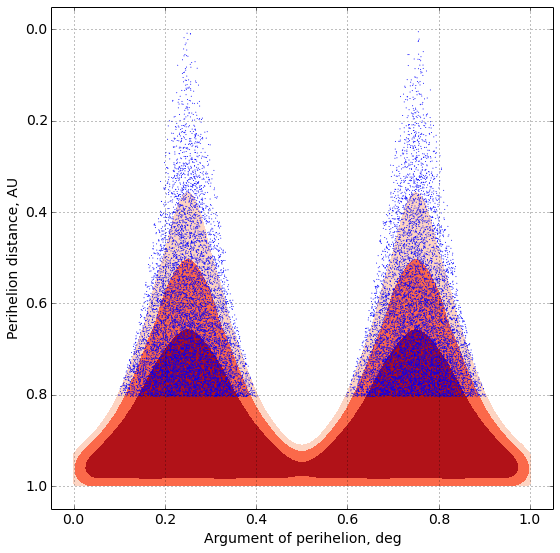

In [234]:
x, y, z = xyz
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.contourf(x, y, z, levels=levels, cmap=plt.cm.Reds)
ax.scatter(nohaz_gen_sg1b_cut[..., 0], nohaz_gen_sg1b_cut[..., 1], s=1, lw=0)
ax.grid(True)
# ax.set_xlim(scales[0])
# ax.set_ylim(scales[1])
ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.invert_yaxis()
plt.show()
# reload(vd)
# vd.plot_kde(kde, levnum=4, figsize=(10,10), scales=scales)

In [235]:
# Zhaz = kde.score_samples(haz_gen_sg1c_cut)
# Znohaz = kde.score_samples(nohaz_gen_sg1c_cut)

Zhaz = kde.score_samples(haz_gen_sg1b_cut)
Znohaz = kde.score_samples(nohaz_gen_sg1b_cut)

** Split datasets by density clusters **

In [236]:
mingi_haz = al.split_minigroups(Zhaz, levels)
mingi_nohaz = al.split_minigroups(Znohaz, levels)

In [237]:
# print mingi_haz[-4]

In [246]:
haz_mg11_inds = mingi_haz[-1]
nohaz_mg11_inds = mingi_nohaz[-1]
haz_gen_mg11 = haz_gen_sg1b_right.iloc[haz_mg11_inds]
nohaz_gen_mg11 = nohaz_gen_sg1b_right.iloc[nohaz_mg11_inds]

haz_mg12_inds = mingi_haz[-2]
nohaz_mg12_inds = mingi_nohaz[-2]
haz_gen_mg12 = haz_gen_sg1b_right.iloc[haz_mg12_inds]
nohaz_gen_mg12 = nohaz_gen_sg1b_right.iloc[nohaz_mg12_inds]

haz_mg13_inds = mingi_haz[-3]
nohaz_mg13_inds = mingi_nohaz[-3]
haz_gen_mg13 = haz_gen_sg1b_right.iloc[haz_mg13_inds]
nohaz_gen_mg13 = nohaz_gen_sg1b_right.iloc[nohaz_mg13_inds]

# haz_mg14_inds = mingi_haz[-4]
# nohaz_mg14_inds = mingi_nohaz[-4]
# haz_gen_mg14 = haz_gen_sg1c.iloc[haz_mg14_inds]
# nohaz_gen_mg14 = nohaz_gen_sg1c.iloc[nohaz_mg14_inds]

haz_rest_inds = list(set(range(len(haz_gen_sg1b_right))) - set(haz_mg11_inds + haz_mg12_inds + haz_mg13_inds))
nohaz_rest_inds = list(set(range(len(nohaz_gen_sg1b_right))) - set(nohaz_mg11_inds + nohaz_mg12_inds + nohaz_mg13_inds))

haz_gen_mg14 = haz_gen_sg1b_right.iloc[haz_rest_inds]
nohaz_gen_mg14 = nohaz_gen_sg1b_right.iloc[nohaz_rest_inds]

In [247]:
def split_minigroup(haz_mg, nohaz_mg, clf, cutcol):
    
    haz_cut, nohaz_cut = ld.cut_2params(cutcol, [haz_mg, nohaz_mg])
    
    haz_predicted = clf.predict(haz_cut)
    nohaz_predicted = clf.predict(nohaz_cut)
    
    haz_extr_inds = np.where(haz_predicted == 1)[0]
    haz_rest_inds = np.where(haz_predicted == 0)[0]

    nohaz_extr_inds = np.where(nohaz_predicted == 1)[0]
    nohaz_rest_inds = np.where(nohaz_predicted == 0)[0]
    
    haz_num = len(haz_extr_inds)
    nohaz_num = len(nohaz_extr_inds)
    purity = float(haz_num)/(haz_num + nohaz_num)
    print "purity:", purity
    
    haz_mg_extr = haz_mg.iloc[haz_extr_inds]
    nohaz_mg_extr = nohaz_mg.iloc[nohaz_extr_inds]
    
    haz_mg_rest = haz_mg.iloc[haz_rest_inds]
    nohaz_mg_rest = nohaz_mg.iloc[nohaz_rest_inds]
    
    return haz_mg_extr, nohaz_mg_extr, haz_mg_rest, nohaz_mg_rest
  

## Mine minigroup 1.1

In [298]:
# vd.display_allparams([haz_gen_mg11, nohaz_gen_mg11], vd.combs, vd.colnames)

In [127]:
# haz_gen_mg11, nohaz_gen_mg11 = haz_gen_sg1c_extr, nohaz_gen_sg1c_extr
# haz_gen_mg11, nohaz_gen_mg11 = haz_gen_sg1c_left, nohaz_gen_sg1c_left

In [556]:
cutcol = ['a', 'i']
labels = [vd.colnames[nm] for nm in cutcol]
# vd.display_param2d(cutcol, labels, [haz_gen_sg1c, nohaz_gen_sg1c], invertaxes=[0,1]) #invertaxes=[0,1]
# vd.display_param2d(cutcol, labels, [haz_gen_mg11, nohaz_gen_mg11], invertaxes=[0,1]) #invertaxes=[0,1]

** Apply simple cut **

In [74]:
# float(len(haz_gen_mg11))/(len(nohaz_gen_mg11) + len(haz_gen_mg11))

In [250]:
cutcol = ['a', 'i']
xtrain_mg11, ytrain_mg11 = ld.learning_sets(haz_gen_mg11, nohaz_gen_mg11, cutcol)
clf11 = tree.DecisionTreeClassifier(max_depth=2) 
clf11 = clf11.fit(xtrain_mg11, ytrain_mg11)

learn_data.py:217: UserWarning: this function is deprecated. use cut_params instead
  warnings.warn("this function is deprecated. use cut_params instead")


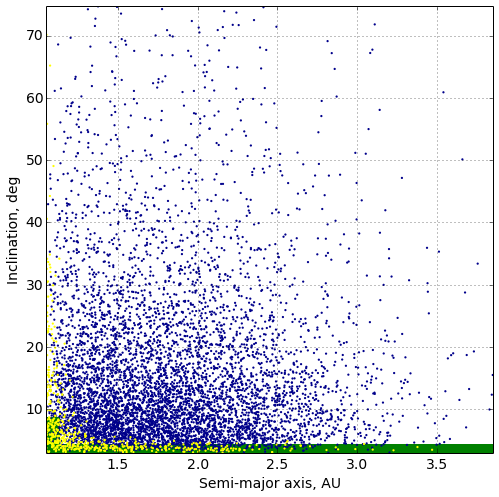

In [251]:
cutcol = ['a', 'i']
haz_gen_mg11_cut, nohaz_gen_mg11_cut = ld.cut_2params(cutcol, [haz_gen_mg11, nohaz_gen_mg11])
labels = [vd.colnames[nm] for nm in cutcol]
vd.plot_classifier(xtrain_mg11, clf11, haz=haz_gen_mg11_cut, nohaz=nohaz_gen_mg11_cut, cmap='ocean_r', 
                   labels=labels, invertaxes=[0,0], rescale=False, figsize=(8,8))

** Analyse prediction score **

In [252]:
al.fit_predict(xtrain_mg11, ytrain_mg11, xtrain_mg11, ytrain_mg11, clf11)

score: 0.932556801841
predict_haz_fraction: 0.0798101811907
true_haz_fraction: 0.0851308599367


** Analyse split quality for minigroup 1.1**

In [253]:
extract11 = split_minigroup(haz_gen_mg11, nohaz_gen_mg11, clf11, cutcol)
haz_gen_mg11_extr, nohaz_gen_mg11_extr, haz_gen_mg11_rest, nohaz_gen_mg11_rest = extract11

purity: 0.610810810811


In [254]:
float(len(haz_gen_mg11_extr))/(len(nohaz_gen_mg11_extr) + len(haz_gen_mg11_extr))

0.6108108108108108

## Mine minigroup 1.2

In [289]:
# vd.display_allparams([haz_gen_mg12, nohaz_gen_mg12], vd.combs, vd.colnames)

In [257]:
# haz_gen_mg12, nohaz_gen_mg12 = haz_gen_sg1c_extr, nohaz_gen_sg1c_extr

In [555]:
cutcol = ['e', 'i']
# labels = [vd.colnames['a'], vd.colnames['i']]
labels = [vd.colnames[nm] for nm in cutcol]
# vd.display_param2d(cutcol, labels, [haz_gen_sg1c_extr, nohaz_gen_sg1c_extr], invertaxes=[0,1]) #invertaxes=[0,1]
# vd.display_param2d(cutcol, labels, [haz_gen_mg12, nohaz_gen_mg12], invertaxes=[0,1]) #invertaxes=[0,1]

** Apply simple cut **

In [264]:
cutcol = ['e', 'i']
xtrain_mg12, ytrain_mg12 = ld.learning_sets(haz_gen_mg12, nohaz_gen_mg12, cutcol)
clf12 = tree.DecisionTreeClassifier(max_depth=2) 
clf12 = clf12.fit(xtrain_mg12, ytrain_mg12)

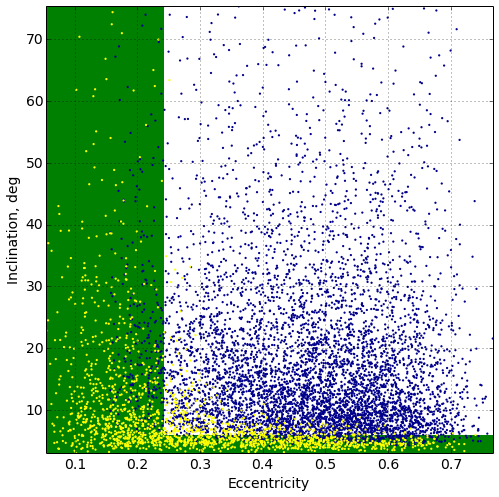

In [265]:
haz_gen_mg12_cut, nohaz_gen_mg12_cut = ld.cut_2params(cutcol, [haz_gen_mg12, nohaz_gen_mg12])
# labels = [vd.colnames['a'], vd.colnames['i']]
vd.plot_classifier(xtrain_mg12, clf12, haz=haz_gen_mg12_cut, nohaz=nohaz_gen_mg12_cut, cmap='ocean_r', 
                   labels=labels, invertaxes=[0,0], rescale=False, figsize=(8,8))

**Analyse prediction score**

In [266]:
al.fit_predict(xtrain_mg12, ytrain_mg12, xtrain_mg12, ytrain_mg12, clf12)

score: 0.885807915301
predict_haz_fraction: 0.248550541971
true_haz_fraction: 0.229644567683


** Analyze split quality for minigroup 1.2**

In [267]:
extract12 = split_minigroup(haz_gen_mg12, nohaz_gen_mg12, clf12, cutcol)
haz_gen_mg12_extr, nohaz_gen_mg12_extr, haz_gen_mg12_rest, nohaz_gen_mg12_rest = extract12

purity: 0.732251521298


## Mine minigroup 1.3

In [290]:
# vd.display_allparams([haz_gen_mg13, nohaz_gen_mg13], vd.combs, vd.colnames)

** Apply simple cut **

In [273]:
cutcol = ['e', 'i']
xtrain_mg13, ytrain_mg13 = ld.learning_sets(haz_gen_mg13, nohaz_gen_mg13, cutcol)
clf13 = tree.DecisionTreeClassifier(max_depth=2) 
clf13 = clf13.fit(xtrain_mg13, ytrain_mg13)

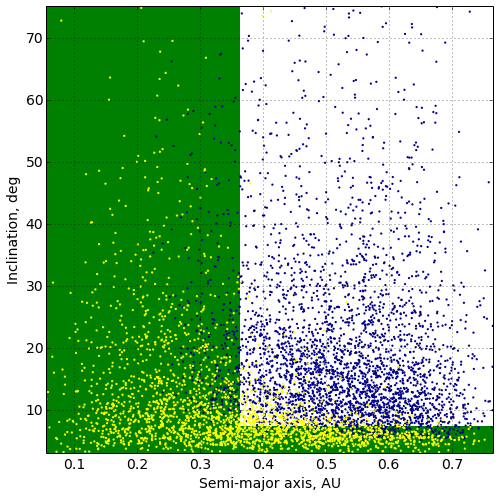

In [274]:
haz_gen_mg13_cut, nohaz_gen_mg13_cut = ld.cut_2params(cutcol, [haz_gen_mg13, nohaz_gen_mg13])
labels = [vd.colnames['a'], vd.colnames['i']]
vd.plot_classifier(xtrain_mg13, clf13, haz=haz_gen_mg13_cut, nohaz=nohaz_gen_mg13_cut, cmap='ocean_r', 
                   labels=labels, invertaxes=[0,0], rescale=False, figsize=(8,8))

**Analyse prediction score**

In [275]:
al.fit_predict(xtrain_mg13, ytrain_mg13, xtrain_mg13, ytrain_mg13, clf13)

score: 0.861441686501
predict_haz_fraction: 0.436416184971
true_haz_fraction: 0.410404624277


** Analyze split quality for minigroup 1.3**

In [276]:
extract13 = split_minigroup(haz_gen_mg13, nohaz_gen_mg13, clf13, cutcol)
haz_gen_mg13_extr, nohaz_gen_mg13_extr, haz_gen_mg13_rest, nohaz_gen_mg13_rest = extract13

purity: 0.811453058044


## Mine minigroup 1.4

In [291]:
# vd.display_allparams([haz_gen_mg14, nohaz_gen_mg14], vd.combs, vd.colnames)

In [278]:
cutcol = ['a', 'i']
xtrain_mg14, ytrain_mg14 = ld.learning_sets(haz_gen_mg14, nohaz_gen_mg14, cutcol)
clf14 = tree.DecisionTreeClassifier(max_depth=2) 
clf14 = clf14.fit(xtrain_mg14, ytrain_mg14)

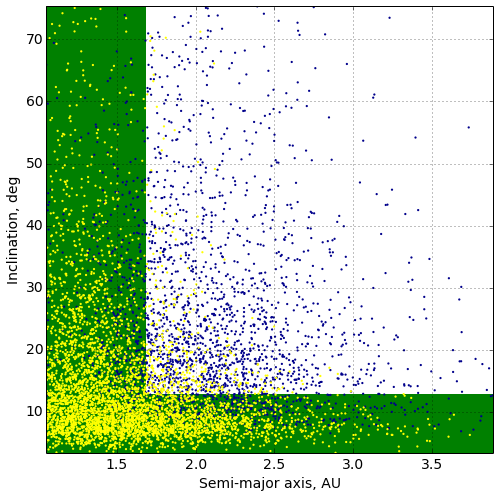

In [279]:
haz_gen_mg14_cut, nohaz_gen_mg14_cut = ld.cut_2params(cutcol, [haz_gen_mg14, nohaz_gen_mg14])
labels = [vd.colnames['a'], vd.colnames['i']]
vd.plot_classifier(xtrain_mg14, clf14, haz=haz_gen_mg14_cut, nohaz=nohaz_gen_mg14_cut, cmap='ocean_r', 
                   labels=labels, invertaxes=[0,0], rescale=False, figsize=(8,8))

In [280]:
al.fit_predict(xtrain_mg14, ytrain_mg14, xtrain_mg14, ytrain_mg14, clf14)

score: 0.830758122744
predict_haz_fraction: 0.705559566787
true_haz_fraction: 0.655884476534


In [281]:
extract14 = split_minigroup(haz_gen_mg14, nohaz_gen_mg14, clf14, cutcol)
haz_gen_mg14_extr, nohaz_gen_mg14_extr, haz_gen_mg14_rest, nohaz_gen_mg14_rest = extract14

purity: 0.844862873516


In [51]:
# vd.display_allparams([haz_genu_sg1d, nohaz_genu_sg1d], vd.combs, vd.colnames)

In [369]:
# haz_gen_mg15 = pd.concat((haz_gen_mg12, haz_gen_mg13, haz_gen_mg14)) 
# nohaz_gen_mg15 = pd.concat((haz_gen_mg12, nohaz_gen_mg13, nohaz_gen_mg14)) 

haz_gen_mg15 = haz_gen_sg1b_extr
nohaz_gen_mg15 = nohaz_gen_sg1b_extr

In [370]:
# vd.display_allparams([haz_gen_mg15, nohaz_gen_mg15], vd.combs, vd.colnames)

In [371]:
cutcol = ['a', 'i']
xtrain_mg15, ytrain_mg15 = ld.learning_sets(haz_gen_mg15, nohaz_gen_mg15, cutcol)
clf15 = tree.DecisionTreeClassifier(max_depth=2)

clf15 = clf15.fit(xtrain_mg15, ytrain_mg15)

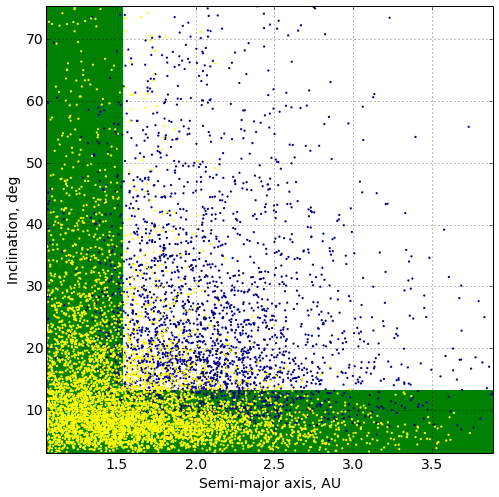

In [372]:
haz_gen_mg15_cut, nohaz_gen_mg15_cut = ld.cut_2params(cutcol, [haz_gen_mg15, nohaz_gen_mg15])
labels = [vd.colnames['a'], vd.colnames['i']]
vd.plot_classifier(xtrain_mg15, clf15, haz=haz_gen_mg15_cut, nohaz=nohaz_gen_mg15_cut, cmap='ocean_r', 
                   labels=labels, invertaxes=[0,0], rescale=False, figsize=(8,8))

In [373]:
al.fit_predict(xtrain_mg15, ytrain_mg15, xtrain_mg15, ytrain_mg15, clf15)

score: 0.838833372066
predict_haz_fraction: 0.673135022078
true_haz_fraction: 0.660237043923


In [374]:
extract15 = split_minigroup(haz_gen_mg15, nohaz_gen_mg15, clf15, cutcol)
haz_gen_mg15_extr, nohaz_gen_mg15_extr, haz_gen_mg15_rest, nohaz_gen_mg15_rest = extract15

purity: 0.870706024512


## Export minigroups

In [373]:
haz_mg_db = [haz_gen_mg11, haz_gen_mg12, haz_gen_mg13]
nohaz_mg_db = [nohaz_gen_mg11, nohaz_gen_mg12, nohaz_gen_mg13]

haz_mg_extr_db = [haz_gen_mg11_extr, haz_gen_mg12_extr, haz_gen_mg13_extr]
nohaz_mg_extr_db = [nohaz_gen_mg11_extr, nohaz_gen_mg12_extr, nohaz_gen_mg13_extr]

haz_mg_rest_db = [haz_gen_mg11_rest, haz_gen_mg12_rest, haz_gen_mg13_rest]
nohaz_mg_rest_db = [nohaz_gen_mg11_rest, nohaz_gen_mg12_rest, nohaz_gen_mg13_rest]

In [46]:
def dump_minigroups(haz_dbs, nohaz_dbs, prefix):
    dirpath = './asteroid_data/'
    basenames = ['gen_mg11', 'gen_mg12', 'gen_mg13']
    for haz, nohaz, basename in zip(haz_dbs, nohaz_dbs, basenames):
        hazpath = dirpath + 'haz_' + basename + prefix + '.p'
        nohazpath = dirpath + 'nohaz_' + basename + prefix + '.p'
        rdb.dumpObject(haz, hazpath)
        rdb.dumpObject(nohaz, nohazpath)

In [47]:
prefixes = ['', '_extr', '_rest']
haz_dbs = [haz_mg_db, haz_mg_extr_db, haz_mg_rest_db]
nohaz_dbs = [nohaz_mg_db, nohaz_mg_extr_db, nohaz_mg_rest_db]

dumpall = [dump_minigroups(haz, nohaz, prefix) 
           for haz, nohaz, prefix in zip(haz_dbs, nohaz_dbs, prefixes)]

## Plot desision boundaries for minigroups in a-i space

In [51]:
# reload(vd)
# labels = [vd.colnames['a'], vd.colnames['i']]
# vd.plot_onegroup(xtrain_mg11, clf11, -4, [-4.0, 0.0], labels=labels, figsize=(8,8))

In [52]:
# vd.plot_onegroup(xtrain_mg12, clf12, -3, [-4.0, 0.0], labels, figsize=(8,8))

In [53]:
# vd.plot_onegroup(xtrain_mg13, clf13, -2, [-4.0, 0.0], labels=labels, figsize=(8,8))

In [ ]:
# xs = gen_sg1a_extr_cut[:,0]
# ys = gen_sg1a_extr_cut[:,1]
# zs = gen_sg1a_extr_cut[:,2]
# print xs[:10]
# print ys[:10]
# print zs[:10]

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# %matplotlib auto
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(xs, ys, zs, c='r', marker='o', lw=0, alpha=1.0, s=10)
# plt.show()